In [139]:
import json
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
with open('../results/statements_scores_by_sentence.json') as file:
    statement_dict = json.load(file)
with open('../results/transcripts_full_score.json') as file:
    transcript_dict = json.load(file)

# Dissent or Not - 1 or 0

In [184]:
def dissent_score(input_list, required_positive, required_negative):
    '''
    input_list::list 
    required_positive::int
    required_negative::int
    Takes in list, and required +/-. Returns 1 if list contains both required number of + and -, 0 otherwise.
    '''
    count_positive = 0
    count_negative = 0

    for value in input_list:
        if value > 0:
            count_positive += 1
            if count_positive >= required_positive:
                if count_negative >= required_negative:
                    return 1
        elif value < 0:
            count_negative += 1
            if count_negative >= required_negative:
                if count_positive >= required_positive:
                    return 1

    return 0

In [185]:
s_year = []
s_dissent = []
for key, value in statement_dict.items():
    scores = [x for x in value if isinstance(x, int) or isinstance(x, float)]
    dissent = dissent_score(input_list=scores, required_positive=1, required_negative=1)
    
    s_year.append(key)
    s_dissent.append(dissent)

In [186]:
sum(s_dissent)/len(s_dissent)

0.4666666666666667

In [187]:
t_year = []
t_dissent = []
for key, value in transcript_dict.items():
    scores = [x for x in list(chain.from_iterable(value.values())) if isinstance(x, int) or isinstance(x, float)]
    dissent = dissent_score(input_list=scores, required_positive=1, required_negative=1)
    
    t_year.append(key)
    t_dissent.append(dissent)

In [188]:
sum(t_dissent)/len(t_dissent)

0.8162162162162162

In [189]:
s_results = pd.DataFrame({'year':s_year,
                          's_dissent':s_dissent})

In [190]:
t_results = pd.DataFrame({'year':t_year,
                          't_dissent':t_dissent})

In [191]:
dissent_results = s_results.merge(t_results, on='year')

/var/folders/n7/vh9m8py927l6jnrw5w7s41rm0000gn/T/ipykernel_2211/3376432966.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.array(A), label='T Dissent Given S Dissent', shade=True, color='blue')
/var/folders/n7/vh9m8py927l6jnrw5w7s41rm0000gn/T/ipykernel_2211/3376432966.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.array(B), label='T Dissent Given S No Dissent', shade=True, color='red')


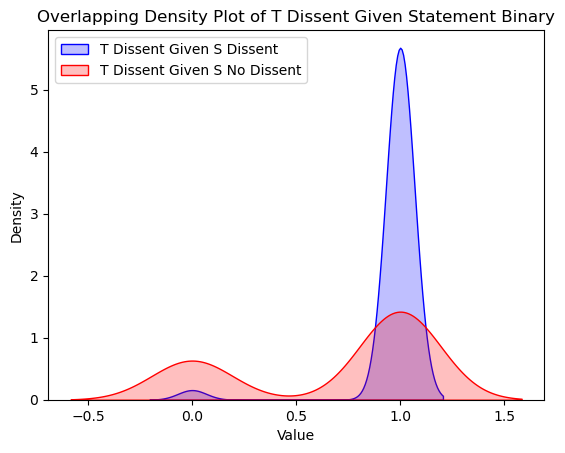

In [192]:
# Transcript Dissent Given Statement Dissent:
A = dissent_results[dissent_results['s_dissent'] == 1]['t_dissent']
# Transcript Dissent Given Statement No Dissent:
B = dissent_results[dissent_results['s_dissent'] == 0]['t_dissent']

# Create a density plot for list A
sns.kdeplot(np.array(A), label='T Dissent Given S Dissent', shade=True, color='blue')

# Create a density plot for list B
sns.kdeplot(np.array(B), label='T Dissent Given S No Dissent', shade=True, color='red')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Overlapping Density Plot of T Dissent Given Statement Binary')
plt.legend(loc='upper left')

# Show the plot
plt.show()

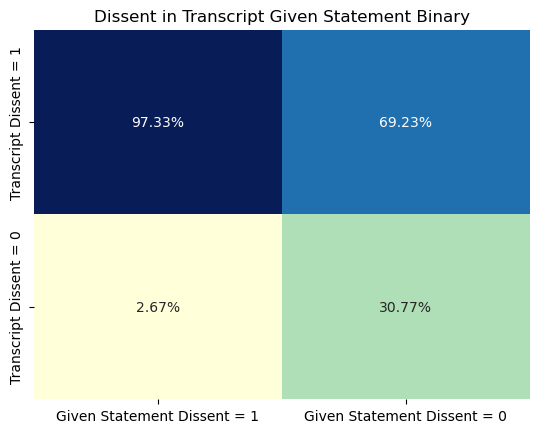

In [193]:
# 2x2 plot of conditional probabilities 

# transcript dissent
A = dissent_results['t_dissent']
# statement dissent
B = dissent_results['s_dissent']

# Calculate conditional probabilities
# P(A=1 | B=1), P(A=1 | B=0), P(A=0 | B=1), P(A=0 | B=0)
p_A1_B1 = np.mean(np.array(A)[np.array(B) == 1])
p_A1_B0 = np.mean(np.array(A)[np.array(B) == 0])
p_A0_B1 = 1 - p_A1_B1
p_A0_B0 = 1 - p_A1_B0

# Create a 2x2 plot with centered text annotations and x-ticks on top
data = np.array([[p_A1_B1, p_A1_B0], [p_A0_B1, p_A0_B0]])
ax = sns.heatmap(data, cmap="YlGnBu", annot=True, fmt=".2%", cbar=False)

# Set labels and titles
ax.set_xticklabels(["Given Statement Dissent = 1", "Given Statement Dissent = 0"])
ax.set_yticklabels(["Transcript Dissent = 1", "Transcript Dissent = 0"])

ax.tick_params(axis='x', which='minor', bottom=False, top=True, labeltop=True)
plt.title("Dissent in Transcript Given Statement Binary")

# Show the plot
plt.show()